### 연습
- 정상영업/폐업 상관없이 현 시점(파일기준) 치킨집의 인허가 분포도(25개 자치구별)
    - 동x
- 영업상태가 폐업인 업장의 자치구별 분포도(업종 일반음식점인 업장)
    - 폐업이 얼마나 되는지
- 강남구의 읍면동별 중국집 분포도(전체인허가/정상영업/폐업 각각에 대해 시각화)
    - 치킨집 -> 중국집
    - 서대문구 -> 강남구 

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import re
import squarify
%matplotlib inline

In [100]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [101]:
data = pd.read_csv('./data/서울특별시_일반음식점.csv', 
                  encoding = 'cp949',
                  low_memory = False)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472915 entries, 0 to 472914
Data columns (total 48 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   번호           472915 non-null  int64  
 1   개방서비스명       472915 non-null  object 
 2   개방서비스아이디     472915 non-null  object 
 3   개방자치단체코드     472915 non-null  int64  
 4   관리번호         472915 non-null  object 
 5   인허가일자        472915 non-null  int64  
 6   인허가취소일자      0 non-null       float64
 7   영업상태구분코드     472915 non-null  int64  
 8   영업상태명        472915 non-null  object 
 9   상세영업상태코드     472915 non-null  int64  
 10  상세영업상태명      472915 non-null  object 
 11  폐업일자         348707 non-null  float64
 12  휴업시작일자       0 non-null       float64
 13  휴업종료일자       0 non-null       float64
 14  재개업일자        0 non-null       float64
 15  소재지전화        327325 non-null  object 
 16  소재지면적        439015 non-null  object 
 17  소재지우편번호      472670 non-null  float64
 18  소재지전체주소      472678 non-

In [103]:
set(data.소재지전체주소.values)

{'서울특별시 양천구 목동 797-4번지',
 '서울특별시 강서구 마곡동 795-7 열린프라자(지상 4층) 401호',
 '서울특별시 서초구 방배동 952-8번지',
 '서울특별시 서초구 우면동 66-2번지 세신상가 211  호',
 '서울특별시 동작구 신대방동 618-26번지',
 '서울특별시 강동구 천호동 400-3번지',
 '서울특별시 강남구 청담동 119-8번지 지하1층~지상5층',
 '서울특별시 영등포구 대림동 976-54번지',
 '서울특별시 영등포구 영등포동4가 69-1번지',
 '서울특별시 서초구 서초동 1676-4번지 4층 4호',
 '서울특별시 마포구 공덕동 249-24번지',
 '서울특별시 강남구 청담동 50-2번지 가호',
 '서울특별시 서초구 반포동 58-9번지 지하1층',
 '서울특별시 마포구 망원동 414-56',
 '서울특별시 송파구 문정동 68-10번지',
 '서울특별시 중랑구 망우동 525-4',
 '서울특별시 광진구 구의동 548-102번지 현대상가 지하동 104호',
 '서울특별시 서대문구 대현동 56-104번지 지상1층',
 '서울특별시 마포구 창전동 5-73번지 1층일부',
 '서울특별시 노원구 공릉동 602-2번지',
 '서울특별시 관악구 봉천동 880-3번지',
 '서울특별시 서초구 양재동 269-3번지 1층 2호',
 '서울특별시 강북구 수유동 192-61 영남빌딩 5층(구청길 22)',
 '서울특별시 송파구 방이동 136-13번지',
 '서울특별시 중랑구 중화동 324-1번지',
 '서울특별시 동작구 사당동 249-11번지',
 '서울특별시 중구 북창동 92번지 (지상1층)',
 '서울특별시 송파구 오금동 160번지 삼성아파트 상가 1층 110호',
 '서울특별시 중구 봉래동2가 1-45번지',
 '서울특별시 양천구 신월동 106-22번지',
 '서울특별시 동작구 신대방동 644-7',
 '서울특별시 영등포구 여의도동 14-21번지 엘지에클라트 비02호',
 '서울특별시 금천구 시흥동 895-6번지 1층',
 '서

In [105]:
set(data.위생업태명[data.위생업태명.str.contains('통닭|치킨', na = False)])
set(data.영업상태명[data.위생업태명.str.contains('통닭|치킨', na = False)])

{'영업/정상', '폐업'}

In [106]:
data_fin = data[['소재지전체주소', '위생업태명']]

In [107]:
data_fin = data_fin[data.위생업태명.isin(['통닭(치킨)', '호프/통닭'])]
data_fin.head()

,소재지전체주소,위생업태명
30,서울특별시 은평구 갈현동 400-9번지 (지하1층),호프/통닭
43,서울특별시 영등포구 양평동3가 101번지 현대아파트 상가내 1층 102호,호프/통닭
44,서울특별시 중구 필동2가 32-24번지 1층,호프/통닭
66,서울특별시 종로구 당주동 128-17번지 (지상1층),호프/통닭
67,서울특별시 서초구 우면동 59번지 105호,호프/통닭


In [108]:
set(data_fin.위생업태명)

{'통닭(치킨)', '호프/통닭'}

In [121]:
res = data_fin.소재지전체주소.str.contains('특별시', na = False)
data_seo = data_fin[res]
data_seo.head()

,소재지전체주소,위생업태명
30,서울특별시 은평구 갈현동 400-9번지 (지하1층),호프/통닭
43,서울특별시 영등포구 양평동3가 101번지 현대아파트 상가내 1층 102호,호프/통닭
44,서울특별시 중구 필동2가 32-24번지 1층,호프/통닭
66,서울특별시 종로구 당주동 128-17번지 (지상1층),호프/통닭
67,서울특별시 서초구 우면동 59번지 105호,호프/통닭


In [122]:
addr = data_fin.소재지전체주소.str.slice(start = 6, stop = 9)

In [123]:
addr

30        은평구
43        영등포
44        중구 
66        종로구
67        서초구
         ... 
472851    서대문
472857    동대문
472872    강남구
472888    노원구
472905    강서구
Name: 소재지전체주소, Length: 44480, dtype: object

In [124]:
ck_cnt = addr.value_counts()

In [125]:
ck_cnt.index
ck_cnt.values

array([2819, 2791, 2700, 2476, 2369, 2284, 2205, 2159, 2159, 2025, 1823,
       1804, 1750, 1712, 1681, 1667, 1623, 1532, 1509, 1185, 1167, 1132,
        718,  641,  525,    1], dtype=int64)

<Axes: >

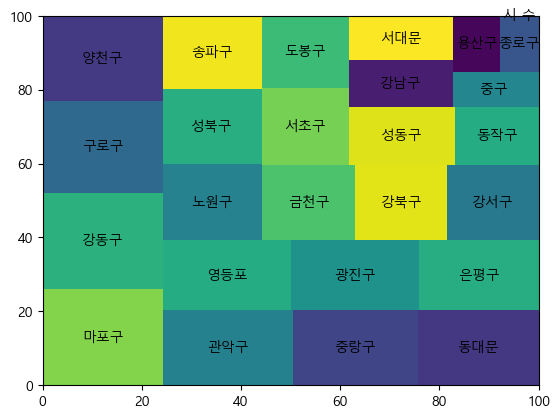

In [126]:
squarify.plot(ck_cnt, label = ck_cnt.index)